In [34]:
import pandas as pd
import numpy as np

In [35]:
data=pd.read_csv(r"C:\Users\Priya\Documents\Time Series\usdinr.csv", index_col='Date', parse_dates=True)
data.head(10)

,Open,High,Low,Close
Date,,,,
2010-01-04,46.48,46.53,46.29,46.31
2010-01-05,46.23,46.25,46.08,46.19
2010-01-06,46.09,46.19,45.92,45.92
2010-01-07,45.78,45.88,45.54,45.66
2010-01-08,45.79,45.88,45.72,45.81
2010-01-11,45.39,45.42,45.28,45.33
2010-01-12,45.48,45.57,45.36,45.57
2010-01-13,45.68,45.71,45.55,45.65
2010-01-14,45.44,45.66,45.44,45.60


In [36]:
data.shape

(3199, 4)

In [37]:
data['Avg']=data[['High', 'Low']].mean(axis=1)

In [38]:
data.head()

,Open,High,Low,Close,Avg
Date,,,,,
2010-01-04,46.48,46.53,46.29,46.31,46.410
2010-01-05,46.23,46.25,46.08,46.19,46.165
2010-01-06,46.09,46.19,45.92,45.92,46.055
2010-01-07,45.78,45.88,45.54,45.66,45.710
2010-01-08,45.79,45.88,45.72,45.81,45.800


<AxesSubplot:xlabel='Date'>

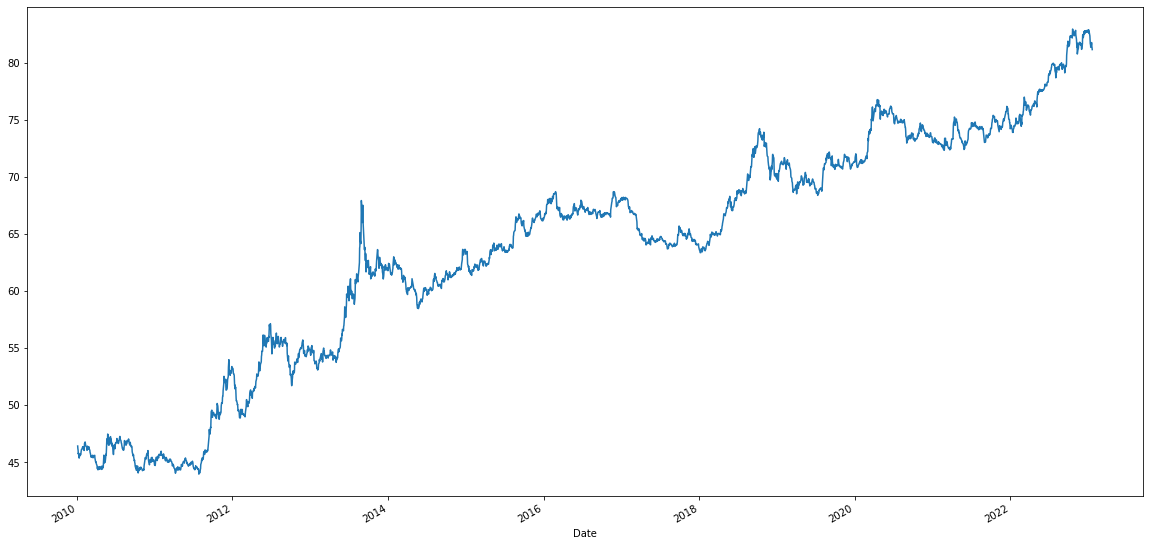

In [39]:
data['Avg'].plot(figsize=(20,10))

### We need to check if the data is stationary in order to proceed with the ARIMA model. This can be done using the augmented Dickey - Fuller test.

In [40]:
from statsmodels.tsa.stattools import adfuller

In [44]:
def testfn(adf_data):
    data_test=adfuller(adf_data, autolag = 'AIC')
    print("1. ADF Value :", data_test[0])
    print("2. P Value :", data_test[1])
    print("3. Number of Lags :", data_test[2])
    print("4. # of observations used for critical value calculation :", data_test[3])
    print("5. Critical values :", data_test[4])
    for key, val in data_test[4].items():
        print("\t", key,":", val)

In [45]:
testfn(data['Avg'])

1. ADF Value : -0.8311100895699833
2. P Value : 0.8098125016319446
3. Number of Lags : 21
4. # of observations used for critical value calculation : 3177
5. Critical values : {'1%': -3.4324099910200605, '5%': -2.8624501783666307, '10%': -2.5672545087086727}
	 1% : -3.4324099910200605
	 5% : -2.8624501783666307
	 10% : -2.5672545087086727


#### The P Value is higher than what is ideal for the dataset to be stationary. Still, let's go ahead with the model to see if it is able to predict with a certain accuracy.

In [46]:
from pmdarima import auto_arima

In [47]:
step_fit = auto_arima(data['Avg'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10.106, Time=4.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46.943, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14.033, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10.132, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=51.304, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14.018, Time=1.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7.686, Time=1.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8.151, Time=1.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5.708, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7.649, Time=1.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9.700, Time=0.96 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=9.465, Time=0.20 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 14.034 seconds


In [48]:
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3199
Model:               SARIMAX(2, 1, 0)   Log Likelihood                   1.146
Date:                Thu, 09 Feb 2023   AIC                              5.708
Time:                        15:52:41   BIC                             29.989
Sample:                             0   HQIC                            14.413
                               - 3199                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0103      0.004      2.377      0.017       0.002       0.019
ar.L1          0.1100      0.011     10.096      0.000       0.089       0.131
ar.L2         -0.0568      0.010     -5.592      0.000      -0.077      -0.037
sigma2         0.0585      0.001     75.284      0.000       0.057       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4262.52
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
data_train=data.iloc[:-10]
data_test=data.iloc[-10:]

In [90]:
data_train.shape

(3189, 5)

In [91]:
data

,Open,High,Low,Close,Avg
Date,,,,,
2010-01-04,46.4800,46.5300,46.2900,46.3100,46.4100
2010-01-05,46.2300,46.2500,46.0800,46.1900,46.1650
2010-01-06,46.0900,46.1900,45.9200,45.9200,46.0550
2010-01-07,45.7800,45.8800,45.5400,45.6600,45.7100
2010-01-08,45.7900,45.8800,45.7200,45.8100,45.8000
...,...,...,...,...,...
2023-01-16,81.3755,81.7375,81.3705,81.6138,81.5540
2023-01-17,81.8285,81.8655,81.7125,81.7735,81.7890
2023-01-18,81.6895,81.7065,81.2425,81.2700,81.4745


In [92]:
model = ARIMA(data_train['Avg'], order=(2,1,0))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Avg   No. Observations:                 3189
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  -1.339
Date:                Mon, 13 Feb 2023   AIC                              8.679
Time:                        08:09:57   BIC                             26.880
Sample:                             0   HQIC                            15.205
                               - 3189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1110      0.011     10.211      0.000       0.090       0.132
ar.L2         -0.0557      0.010     -5.489      0.000      -0.076      -0.036
sigma2         0.0586      0.001     75.587      0.000       0.057       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4282.20
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Now that the model is fit, we need to make some predictions using it. 

In [93]:
initial = len(data_train)
final= len(data)-1
prediction = model.predict(start=initial, end=final, typ="levels")
print(prediction)

3189    82.704392
3190    82.702362
3191    82.700972
3192    82.700931
3193    82.701004
3194    82.701015
3195    82.701012
3196    82.701011
3197    82.701011
3198    82.701011
Name: predicted_mean, dtype: float64


In [94]:
prediction.index=data.index[initial:final+1]
print(prediction)

Date
2023-01-09    82.704392
2023-01-10    82.702362
2023-01-11    82.700972
2023-01-12    82.700931
2023-01-13    82.701004
2023-01-16    82.701015
2023-01-17    82.701012
2023-01-18    82.701011
2023-01-19    82.701011
2023-01-20    82.701011
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

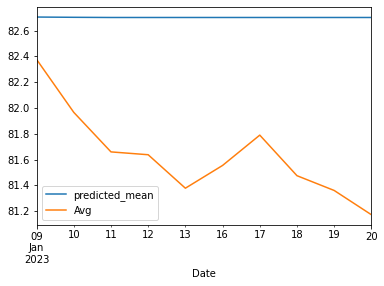

In [95]:
prediction.plot(legend=True)
data_test['Avg'].plot(legend=True)

#### Now we need to check the mean squared error 

In [96]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(prediction, data_test['Avg']))
print(rmse)

1.113914177968862


In [98]:
data_test['Avg'].mean()

81.63645

#### Root mean squared error is very less compared to the mean value 

## Making predictions about future dates 

#### We train the entire dataset again before making a future prediction

In [99]:
model1=ARIMA(data['Avg'], order=(1,0,5))
model1=model1.fit()


In [100]:
data.tail(1)

,Open,High,Low,Close,Avg
Date,,,,,
2023-01-20,81.2695,81.2695,81.0745,81.1662,81.172


In [104]:
new_index=pd.date_range(start='2023-01-20', end='2023-02-12')
print(new_index)

DatetimeIndex(['2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
               '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12'],
              dtype='datetime64[ns]', freq='D')


In [106]:
prediction1=model1.predict(start= len(data), end=len(data)+23, typ='levels')
prediction1.index=new_index

<AxesSubplot:>

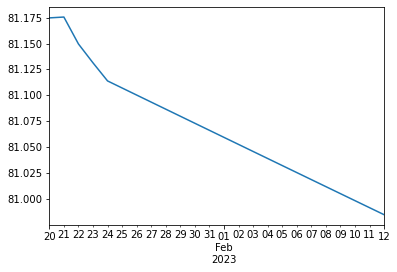

In [109]:
prediction1.plot()